In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cats.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [4]:
df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [66]:
X = df.iloc[:, 0:2]
y = df.Вид

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [68]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 163.07999999999998, 'Гавкает <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]\nclass = Cats'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Cats'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Dogs')]

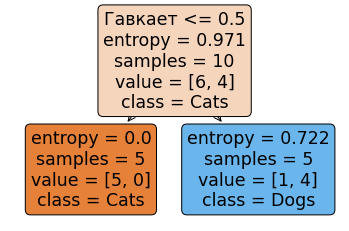

In [69]:
tree.plot_tree(clf, feature_names=list(X), class_names=['Cats', 'Dogs'], filled=True, rounded=True)

In [20]:
import math

-0.15200309344504995

In [21]:
def entropy(possibilities):
    result = 0
    for p in possibilities:
        result -= p * math.log2(p)
    return result

In [54]:
N = 10
cats = 6
dogs = N - cats
p_cats = 6/10
p_dogs = 1 - p_cats
entr_Y = -p_cats * math.log2(p_cats) - p_dogs * math.log2(p_dogs)
entr_Y

0.9709505944546686

In [60]:
n0 = 1
n1 = N - n0
e1_fur = entropy([4/9, 5/9])
e0_fur = 0
e_y_fur = n0/N*e0_fur + n1/N*e1_fur
IG_fur = entr_Y - e_y_fur
IG_fur

0.07898214060026854

In [83]:
n0 = 5
n1 = N - n0
e1_bark = entropy([4/5, 1/5])
e0_bark = 0
e_y_bark = n0/N*e0_bark + n1/N*e1_bark
IG_bark = entr_Y - e_y_bark
IG_bark

0.6099865470109874

In [75]:
n0 = 4
n1 = N - n0
e1_climb = 0
e0_climb = 0
e_y_climb = n0/N*e1_climb + n1/N*e0_climb
IG_climb = entr_Y - e_y_climb
IG_climb

0.9709505944546686

In [72]:
e_y_climb

0.0

In [52]:
IG_climb

0.9709505944546686

In [36]:
0.9 - 0.9 * entropy([4/9, 5/9]) + 0.1*0

0.008031546145599977

In [35]:
1 - entropy([4/5, 1/5])/2

0.6390359525563188